In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# 코랩 한글 깨짐 현상 해결
# 실행 후, 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and direct

In [ ]:
!pip install scikit-learn-extra
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering

## 데이터 로드 및 전처리

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/최종데이터_final_ver1.csv", encoding="CP949")
df["cctvid"] = df["cctvid"].astype(int)

cctv = pd.read_csv("/content/drive/MyDrive/WCRC2023/데이터/최종 데이터/CCTV현황_ver4.csv", encoding="CP949")

## 스케일러

In [ ]:
# feature 생성
data = df.copy()
features = data[["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]]

# 데이터 스케일링
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

robust_scaled_features = robust_scaler.fit_transform(features)
minmax_scaled_features = minmax_scaler.fit_transform(features)
standard_scaled_features = standard_scaler.fit_transform(features)

# 스케일링 후, 데이터프레임 생성
robust_scaled_df = pd.DataFrame(robust_scaled_features, columns=features.columns)
minmax_scaled_df = pd.DataFrame(minmax_scaled_features, columns=features.columns)
standard_scaled_df = pd.DataFrame(standard_scaled_features, columns=features.columns)

# 시각화를 위한 그림 크기 설정 및 글꼴 설정
plt.rcParams["font.family"] = "NanumBarunGothic"
plt.figure(figsize=(18, 6))

# RobustScaler를 적용한 데이터 분포 시각화
plt.subplot(1, 3, 1)
for column in robust_scaled_df.columns:
    sns.kdeplot(robust_scaled_df[column], label=column)
plt.title("RobustScaler 데이터 분포")
plt.xlabel("Scaled Feature Value")
plt.ylabel("Density")
plt.legend()

# MinMaxScaler를 적용한 데이터 분포 시각화
plt.subplot(1, 3, 2)
for column in minmax_scaled_df.columns:
    sns.kdeplot(minmax_scaled_df[column], label=column)
plt.title("MinMaxScaler 데이터 분포")
plt.xlabel("Scaled Feature Value")
plt.ylabel("Density")
plt.legend()

# StandardScaler를 적용한 데이터 분포 시각화
plt.subplot(1, 3, 3)
for column in standard_scaled_df.columns:
    sns.kdeplot(standard_scaled_df[column], label=column)
plt.title("StandardScaler 데이터 분포")
plt.xlabel("Scaled Feature Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

## 클러스터 수

### K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

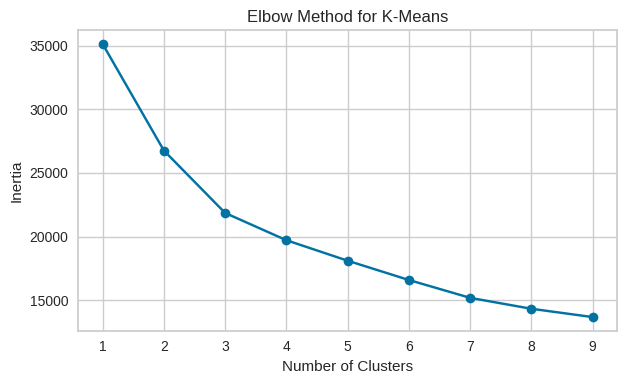

In [ ]:
# 데이터 로드
data = df.copy()
X = data.drop(["cctvid"], axis=1)

# 데이터 스케일 조정
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수 후보 범위
cluster_range = range(1, 10)

# Elbow Method를 이용한 K-means 클러스터 개수 탐색
inertia_values = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Elbow Method 그래프 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker="o")
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()

In [ ]:
# 데이터 로드
data = df.copy()
X = data.drop(["cctvid"], axis=1)

# 데이터 스케일 조정
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수 후보 범위 및 변수 생성
cluster_range = range(2, 10)
best_n = 0
best_silhouette_score = 0

# Silhouteet Score를 이용한 K-means 클러스터 개수 탐색
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster)
    if score > best_silhouette_score:
        best_n = n_clusters
        best_silhouette_score = score

print("최적의 클러스터 수 =", best_n, "\nSilhouette Score =", best_silhouette_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

최적의 클러스터 수 = 2 
Silhouette Score = 0.2357852021013517


### Gaussian Mixture Model

In [ ]:
# 데이터 로드
data = df.copy()
X = data.drop(["cctvid"], axis=1)

# 데이터 스케일 조정
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수 후보 범위 및 변수 생성
cluster_range = range(2, 10)
best_n = 0
best_silhouette_score = 0

# Silhouette Score를 이용한 GMM 클러스터 개수 탐색
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X_scaled)
    clusters = gmm.predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    if score > best_silhouette_score:
        best_n = n_clusters
        best_silhouette_score = score

print("최적의 클러스터 수 =", best_n, "\nSilhouette score =", best_silhouette_score)

최적의 클러스터 수 = 2 
Silhouette score = 0.20498829157294782


### K-Medoids

In [ ]:
# 데이터 로드
data = df.copy()
data = data.drop(["cctvid"], axis=1)

# 데이터 스케일 조정
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수 후보 범위 및 변수 생성
cluster_range = range(2, 10)
best_n = 0
best_silhouette_score = 0

# Silhouette Score를 이용한 K-Medoids 클러스터 개수 탐색
for n_clusters in cluster_range:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids.fit(X_scaled)
    clusters = kmedoids.predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    if score > best_silhouette_score:
        best_n = n_clusters
        best_silhouette_score = score

print("최적의 클러스터 수 =", best_n, "\nSilhouette score =", best_silhouette_score)

최적의 클러스터 수 = 2 
Silhouette score = 0.19723339288877564


## 클러스터링

### K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


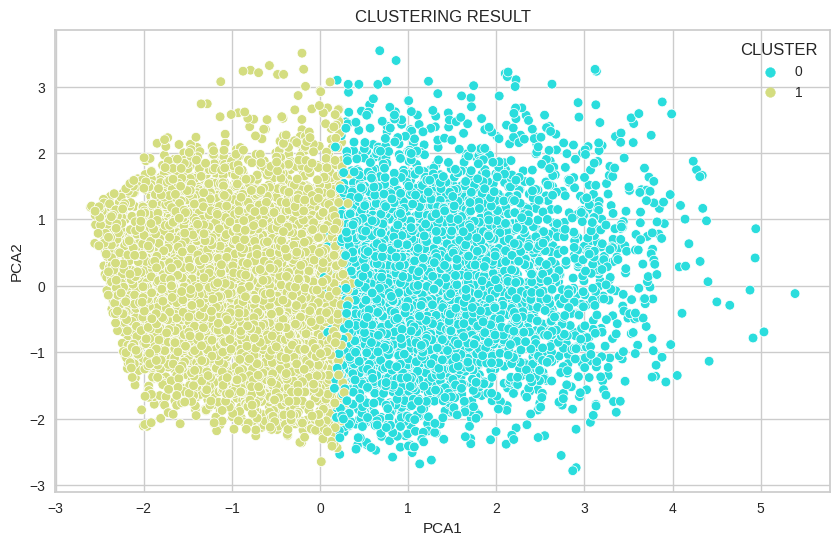

In [ ]:
# K-means
# feature 형성
data = df.copy()
features = data[["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]]

# 스케일러 적용 및 데이터 형성
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 모델 정의 및 CLUSTER 컬럼 추가
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data["CLUSTER"] = kmeans.fit_predict(scaled_features)

# PCA를 사용하여 데이터 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

data["PCA1"] = pca_result[:, 0]
data["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="PCA1", y="PCA2", hue="CLUSTER", palette="rainbow")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("CLUSTERING RESULT")
plt.show()

In [ ]:
# 각 군집의 중심 좌표 출력
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)
cluster_centers_df["sum"] = cluster_centers_df[["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]].sum(axis=1)

print("각 군집의 중심 좌표:")
cluster_centers_df


각 군집의 중심 좌표:


,관측소_거리,지하철역_지표,버스정류장_이용객수,처리시설_개수,학교_거리,CAI,sum
0,-0.404028,0.784483,0.765935,0.440554,0.616369,-0.184571,2.018741
1,0.265669,-0.515837,-0.503640,-0.289686,-0.405293,0.121365,-1.327423


In [ ]:
kmeans_result = data[["cctvid", "CLUSTER"]].loc[data["CLUSTER"]==0]

kmeans_list = []
for i in kmeans_result["cctvid"]:
    kmeans_list.append(i)

### Gaussian Mixture Model

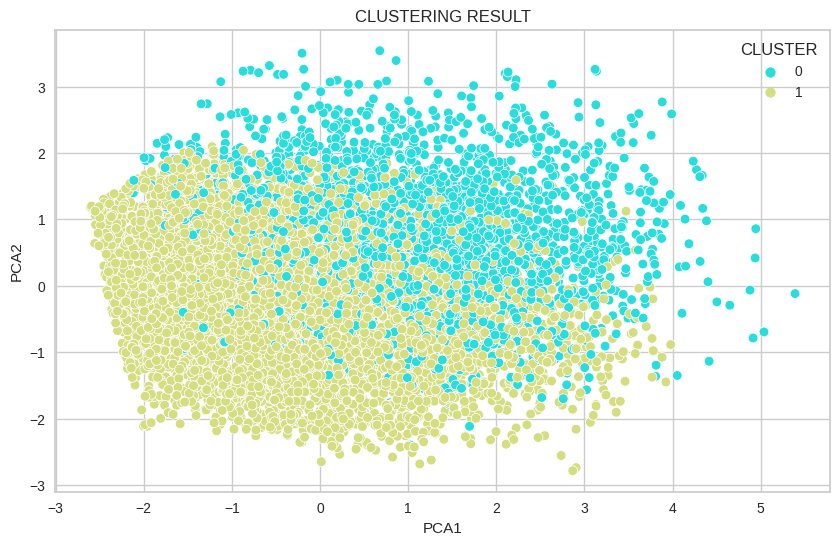

In [ ]:
# Gaussian Mixture Model(GMM)
# feature 형성
data = df.copy()
features = data[["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]]

# 스케일러 적용 및 데이터 형성
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 모델 정의 및 CLUSTER 컬럼 추가
num_clusters = 2
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
data["CLUSTER"] = gmm.fit_predict(scaled_features)

# PCA를 사용하여 데이터 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

data["PCA1"] = pca_result[:, 0]
data["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="PCA1", y="PCA2", hue="CLUSTER", palette="rainbow")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("CLUSTERING RESULT")
plt.show()

In [ ]:
# 각 군집의 중심 좌표 출력
cluster_centers = gmm.means_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)
cluster_centers_df["sum"] = cluster_centers_df[["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]].sum(axis=1)

print("각 군집의 중심 좌표:")
cluster_centers_df


각 군집의 중심 좌표:


,관측소_거리,지하철역_지표,버스정류장_이용객수,처리시설_개수,학교_거리,CAI,sum
0,-0.220296,0.325197,0.329317,1.460023,0.194120,0.000239,2.088600
1,0.082778,-0.122195,-0.123743,-0.548615,-0.072942,-0.000090,-0.784808


In [ ]:
# 클러스터 결정 및 행정동 목록 저장
gaussian_result = data[["cctvid", "CLUSTER"]].loc[data["CLUSTER"]==0]

gaussian_list = []
for i in gaussian_result["cctvid"]:
    gaussian_list.append(i)

### K-Medoids

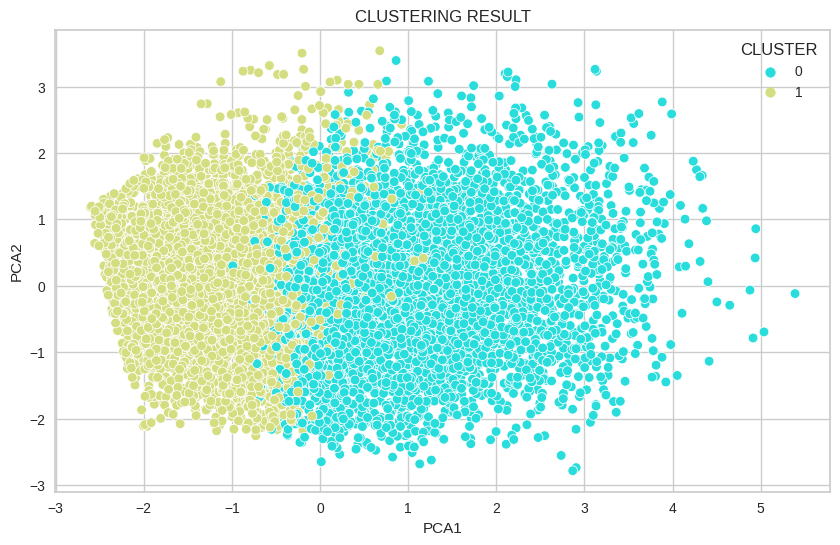

In [ ]:
# K-Medoids
# feature 형성
data = df.copy()
features = data[["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]]

# 스케일러 적용 및 데이터 형성
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 모델 정의 및 CLUSTER 컬럼 추가
num_clusters = 2
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)
data["CLUSTER"] = kmedoids.fit_predict(scaled_features)

# PCA를 사용하여 데이터 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

data["PCA1"] = pca_result[:, 0]
data["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="PCA1", y="PCA2", hue="CLUSTER", palette="rainbow")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("CLUSTERING RESULT")
plt.show()

In [ ]:
# 각 군집의 중심 좌표 출력
medoid_indices = kmedoids.medoid_indices_
kmedoids_centers = scaled_features[medoid_indices]
kmedoids_centers_df = pd.DataFrame(kmedoids_centers, columns=["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"])
kmedoids_centers_df["sum"] = kmedoids_centers_df[["관측소_거리", "지하철역_지표", "버스정류장_이용객수", "처리시설_개수", "학교_거리", "CAI"]].sum(axis=1)

print("각 군집의 중심 좌표:")
kmedoids_centers_df


각 군집의 중심 좌표:


,관측소_거리,지하철역_지표,버스정류장_이용객수,처리시설_개수,학교_거리,CAI,sum
0,-0.322568,0.353609,0.458415,-0.548615,0.621869,-0.037169,0.525541
1,0.204743,-0.673708,-0.737605,-0.548615,-0.763181,0.062680,-2.455686


In [ ]:
# 클러스터 결정 및 행정동 목록 저장
kmedoids_result = data[["cctvid", "CLUSTER"]].loc[data["CLUSTER"]==0]

kmedoids_list = []
for i in kmedoids_result["cctvid"]:
    kmedoids_list.append(i)

## 클러스터링 결과

In [ ]:
print(len(kmeans_list))
print(len(gaussian_list))
print(len(kmedoids_list))

3958
2731
5164


In [ ]:
# 각 모델의 결정된 클러스터의 공통 추출
elements = set(kmeans_list) & set(gaussian_list) & set(kmedoids_list)
result = list(elements)

# 데이터 내에서 확인
result_df = df[df["cctvid"].isin(result)]

result = result_df.merge(cctv, on=["cctvid"])
result = result[["cctvid", "소재지지번주소", "위도", "경도"]]
result = result.rename(columns={"소재지지번주소":"소재지_지번주소"})
result = result.merge(df, on=["cctvid"])

In [ ]:
result

,cctvid,소재지_지번주소,위도,경도,관측소_거리,버스정류장_이용객수,지하철역_지표,학교_거리,처리시설_개수,CAI
0,27732,경기도 의정부시 용현동 391-2,37.737015,127.077234,773.428059,1105.0,4734.835481,0.003987,1.0,56.081565
1,31202,경기도 평택시 가재동 593-10,37.040763,127.085926,6228.408122,22.0,1499.594812,0.004801,2.0,61.861948
2,1931,경기도 광명시 광명동 158-103번지,37.480783,126.854474,984.687534,794.4,10823.602868,0.003703,1.0,57.684087
3,17236,경기도 안산시 상록구 월피동 505-6,37.334482,126.841302,5938.680680,701.0,6114.943147,0.003608,1.0,56.613909
4,14574,경기도 수원시 팔달구 화서동 679-8,37.286487,126.989911,6702.419166,1274.2,8281.573817,0.002470,1.0,57.977141
...,...,...,...,...,...,...,...,...,...,...
1797,33191,경기도 평택시 합정동 896-9,36.990148,127.103181,773.428059,2139.0,5827.117242,0.003055,1.4,58.666078
1798,4832,경기도 김포시 북변동 136 (하이마트 뒤 경희어린이집),37.630798,126.705530,3132.123913,2254.0,12309.409388,0.002719,1.0,58.886368
1799,33166,경기도 평택시 합정동 392-1,36.988186,127.109064,773.428059,1409.0,4347.426263,0.005152,2.0,59.635533
1800,8426,경기도 부천시 심곡동 407-2,37.488233,126.778895,1926.335513,2083.0,10071.799945,0.002284,1.2,58.978887


In [ ]:
result.to_csv("모델링_결과_StandardScaler.csv", encoding="CP949", index=False)